# Лабораторная работа 6. Фабарисов Дмитрий. 2 курс АД

In [29]:
import cv2
import random
import skimage.io as sk
import matplotlib.pyplot as plt
import numpy as np
import copy as cp
import glob
from collections import Counter
import pandas as pd
import skimage.feature as sf
import skimage
from sklearn.cluster import KMeans

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
def show_pic(pic_list, name = ['picture']*100, figsize_ = (10, 8)):
    fig = figure(figsize = figsize_)
    for idx in range(len(pic_list)):
        subplot = fig.add_subplot(1, len(pic_list), idx+1)
        sk.imshow(pic_list[idx])
        subplot.set_title(name[idx])

## Читаем все изображения

In [4]:
images = []
for img_index, filename in enumerate(glob.iglob('part1/*.jpg')):
    images.append(cv2.imread(filename))

In [44]:
train_images = []
test_images = []
train_y = []
test_y = []
train_classes = dict(pd.read_csv('./part2/train.csv').as_matrix())
test_classes = dict(pd.read_csv('./part2/test.csv').as_matrix())

for img_index, filename in enumerate(glob.iglob('part2/train/*.jpg')):
    train_images.append(cv2.imread(filename))
    train_y.append(train_classes[filename[12:]])


for img_index, filename in enumerate(glob.iglob('part2/test/*.jpg')):
    test_images.append(cv2.imread(filename))
    test_y.append(test_classes[filename[11:]])
    

## Посмотрим на keypoints на произвольной картинке

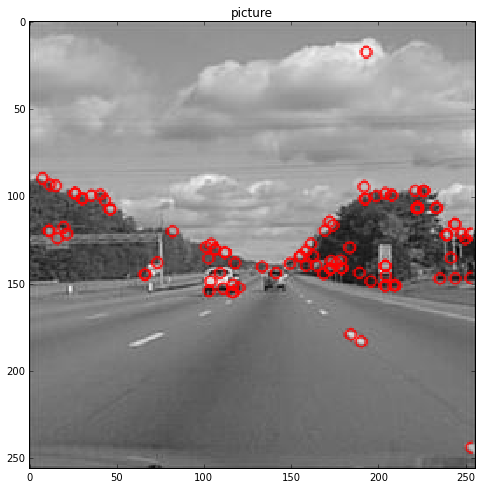

In [5]:
sift = cv2.SIFT(100)

insex = 67

keypoints = sift.detect(images[insex])
new_pic = cv2.drawKeypoints(images[insex], keypoints, color = 1000)
show_pic([new_pic])

## Для различного числа сифтов будем запускать кластеризацию и визуально оценивать зависимость качества от числа сифтов

In [6]:
sift = cv2.SIFT(100)
features = []
keypoints = []
image_numbers = []
for image_index, image in enumerate(images):
    keys, descs = sift.detectAndCompute(image, None)
    for i in range(len(keys)):
        keypoints.append(keys[i])
        features.append(descs[i]) 
        image_numbers.append(image_index)

In [7]:
def draw_kp(kp_indexes, keypoints, images):
    pics = []
    f, axarr = plt.subplots(1, len(kp_indexes), figsize=(20,2))
    for i, kp_index in enumerate(kp_indexes):
        image = images[image_numbers[kp_index]]
        keypoint = keypoints[kp_index]
        x, y = keypoint.pt
        size = keypoint.size
        axarr[i].imshow(image[max(y-10, 0):y+10, max(0, x-10):x+10])
        axarr[i].set_xticks(())
        axarr[i].set_yticks(())

In [8]:
def find_clusters_number(clusters_number = 135):
    import random
    y_pred = KMeans(n_clusters=clusters_number).fit_predict(features)
    example_cluster_0 = [i for i in range(len(y_pred)) if y_pred[i] == 2]
    example_cluster_1 = [i for i in range(len(y_pred)) if y_pred[i] == 37]
    example_cluster_2 = [i for i in range(len(y_pred)) if y_pred[i] == 13]
    draw_kp(random.sample(example_cluster_0, 10), keypoints, images)
    draw_kp(random.sample(example_cluster_1, 10), keypoints, images)
    draw_kp(random.sample(example_cluster_2, 10), keypoints, images)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


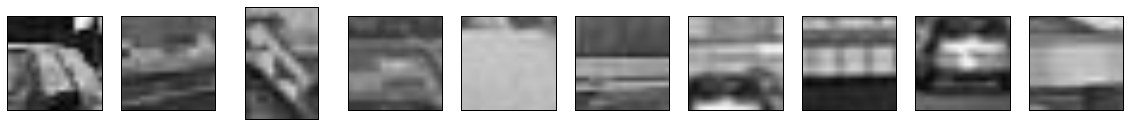

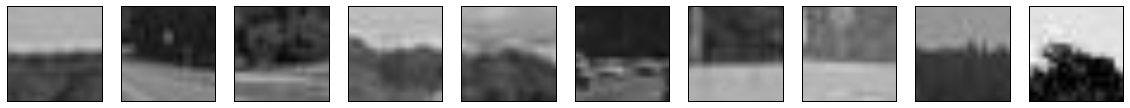

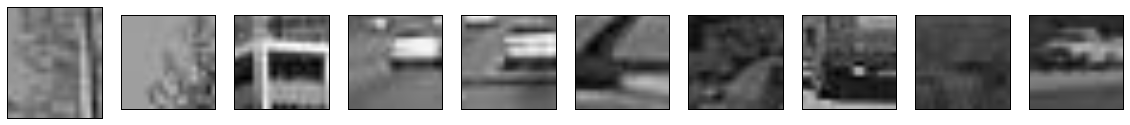

In [9]:
find_clusters_number(50)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


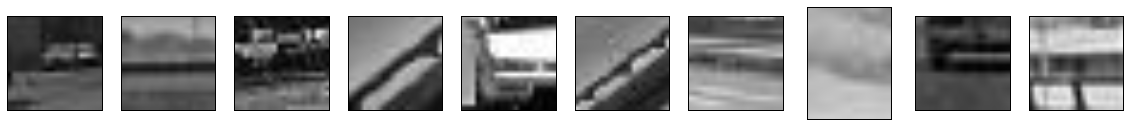

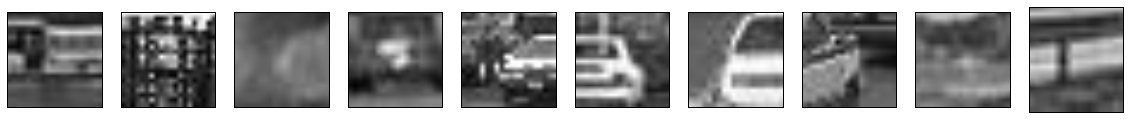

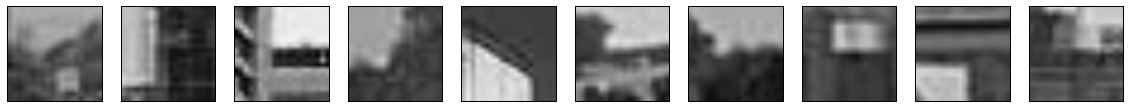

In [10]:
find_clusters_number(80)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


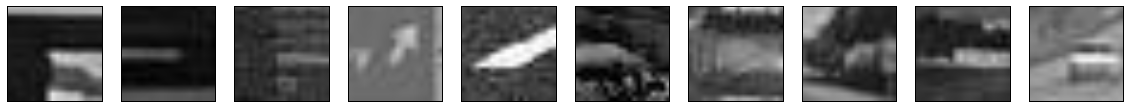

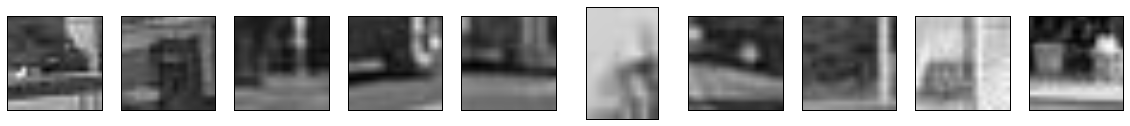

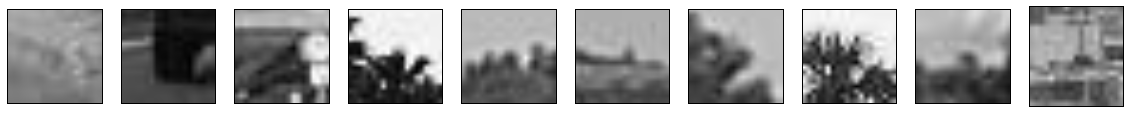

In [11]:
find_clusters_number(100)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


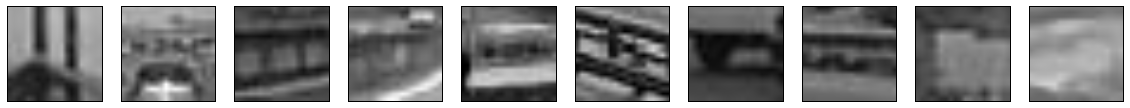

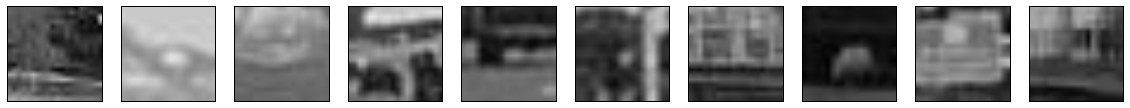

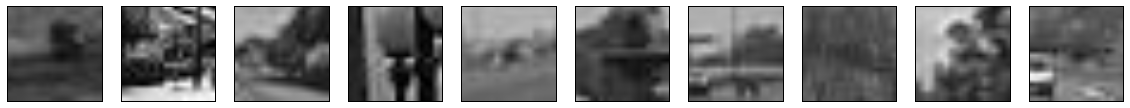

In [12]:
find_clusters_number(120)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


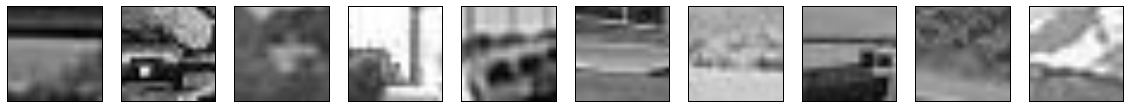

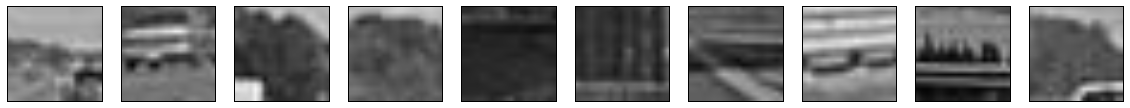

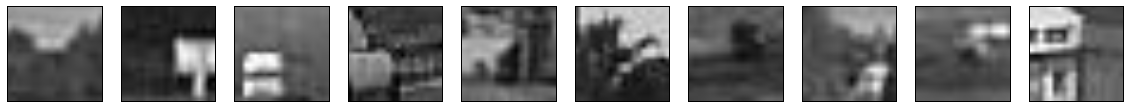

In [13]:
find_clusters_number(150)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


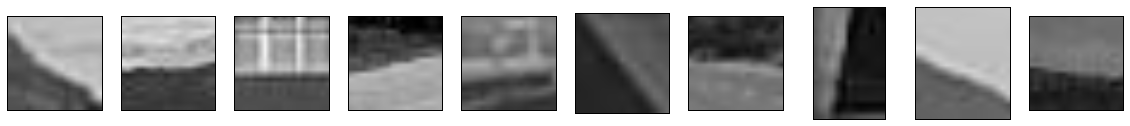

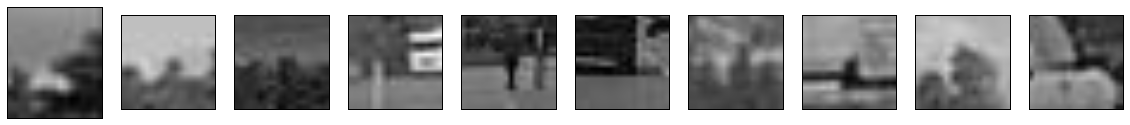

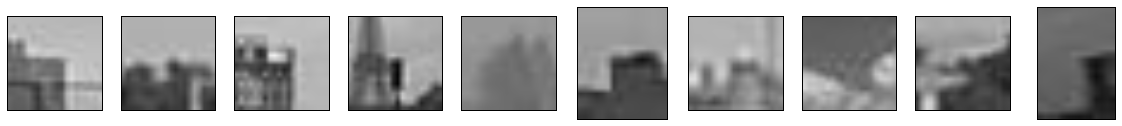

In [14]:
find_clusters_number(175)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


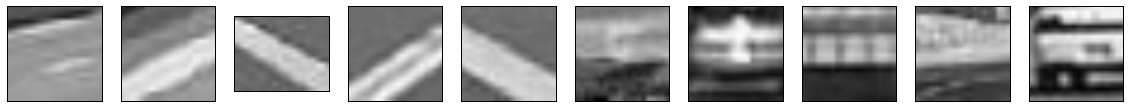

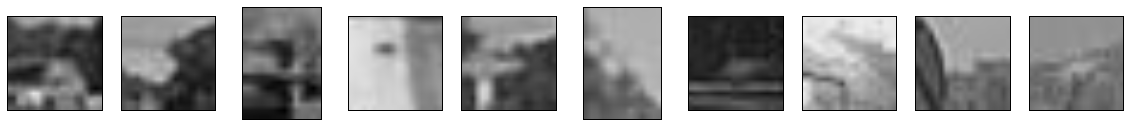

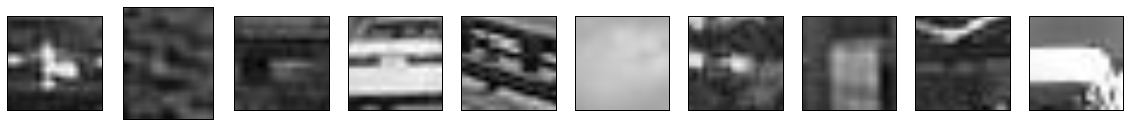

In [15]:
find_clusters_number(200)

## Видим, что лучше 100 - 120 кластеров


In [33]:
n_clusters = 120
n_keypoints = 100

In [91]:
descriptors = np.zeros((0, 128))
images_indexes = np.array([], dtype=int)
keypoints = []
for idx, image in enumerate(train_images):
    kp, des = sift.detectAndCompute(image, None)
    descriptors = np.append(descriptors, des, axis=0)
    keypoints = np.append(keypoints, kp)
    images_indexes = np.append(images_indexes, [idx]*len(des))
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(descriptors)

clusters = kmeans.predict(descriptors)
dictionary = kmeans.cluster_centers_
labels = kmeans.labels_

In [92]:
def image_to_words(image):
    sift = cv2.SIFT(n_keypoints)
    kp, des = sift.detectAndCompute(image, None)
    counts = Counter(kmeans.predict(des))
    if sum(list(counts.elements())) == 0:
        return [0] * n_clusters
    # какое тут деление?
    return [1.0 * counts[idx]/sum(list(counts.elements())) for idx in range(n_clusters)]



In [93]:
train_X = []
i = len(train_images)
print i 
for image in train_images:
    if (i % 100 == 0):
        print i
    train_X.append(image_to_words(image))
    i-= 1

1000
1000
900
800
700
600
500
400
300
200
100


In [94]:
test_X = []
for image in test_images:
    test_X.append(image_to_words(image))

In [95]:
from sklearn.ensemble import RandomForestClassifier as RFC

clf = RFC()
clf.fit(train_X, train_y)
predicted_y = clf.predict(test_X)

In [100]:
1.0 * sum(predicted_y == test_y) / len(predicted_y)

0.615